## 1. Answer Questions
In Figure 1, we show that using a target_node/search_term, we can query neighbouring nodes to answer causal questions.

In [2]:
import pandas as pd
import os

In [114]:
graph_folder = r"D:\66 CausalMap\SciLit_CausalMap\visualization\mir_paper"
graph_tmp = pd.read_pickle(os.path.join(graph_folder,'nodes_extracted_infos.pkl'))
graph_df = pd.read_csv(os.path.join(graph_folder,'graph_clustered.csv'))
graph_tmp['cause_topic'] = graph_df['cause']
graph_tmp['effect_topic'] = graph_df['effect']
graph_tmp

,cause,effect,source,support,evidence,cause_action,effect_action,cause_action_rem,effect_action_rem,evidence_ner,cause_store,effect_store,cause_topic,effect_topic
0,a lack of demand for their products .,"prior to ford , two more american firms - gene...",f-0,1,a lack of demand for their products . --> Prio...,a lack of demand for their products .,"prior to [ORGANIZATION] , two more american fi...",a lack of demand for their products .,"prior to [MASK] , two more american firms - [M...","[(a, O), (lack, O), (of, O), (demand, O), (for...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [...",2428>>lack_products_gap_osy_addressed,695>>bert_stopped_ck_ru_orders
1,that there would be a rise in the demand for h...,foreign automobile manufacturers had set up th...,f-0,1,that there would be a rise in the demand for h...,that there would be a rise in the demand for h...,foreign automobile manufacturers had set up th...,that there would be a rise in the demand for h...,foreign automobile manufacturers had set up th...,"[(that, O), (there, O), (would, O), (be, O), (...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [...",1667>>demand_cars_late_increasing_prices,68>>automobile_automotive_thriving_production_...
2,the implementation of b hara t stage vi standards,car manufacturers a bomb .,f-0,1,The implementation of B hara t Stage VI standa...,the implementation of b hara t stage vi standards,car manufacturers a bomb .,the implementation of b hara t stage vi standards,car manufacturers a bomb .,"[(The, O), (implementation, O), (of, O), (B, O...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [...",2746>>bs_norms_emission_vi_meet,275>>car_makers_carmakers_bomb_european
3,ad d to it the rising cost of fuel,driving a car in india becomes a truly elite e...,f-0,1,Ad d to it the rising cost of fuel --> driving...,ad d to it the rising cost of fuel,driving a car in [LOCATION] becomes a truly el...,ad d to it the rising cost of fuel,driving a car in [MASK] becomes a truly elite ...,"[(Ad, O), (d, O), (to, O), (it, O), (the, O), ...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [...",211>>fuel_environmental_concerns_increasing_costs,1108>>driving_claims_capability_wet_performance
4,the increase in the price of cars over the las...,writer and analyst ra no joy mu ker ji,f-0,1,the increase in the price of cars over the las...,the increase in the price of cars over the [DA...,writer and analyst [PERSON],the increase in the price of cars over the [MA...,writer and analyst [MASK],"[(the, O), (increase, O), (in, O), (the, O), (...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [...",233>>prices_hike_car_vehicles_kes,1230>>writer_researcher_analyst_researchers_pr...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20170,", sees china ' s shortage continuing through 2...",and de ems it dangerous to hold inventory afte...,f-1002,1,", sees China ' s shortage continuing through 2...",", sees [LOCATION] ' s shortage continuing thro...",and de ems it dangerous to hold inventory afte...,", sees [MASK] ' s shortage continuing through ...",and de ems it dangerous to hold inventory afte...,"[(,, O), (sees, O), (China, LOCATION), (', O),...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [...",2145>>prolonged_sees_continuing_shortage_short...,2299>>ems_dangerous_inventory_hold_raiding
20171,to stem from the merger between the italian am...,", the group set",f-1003,1,to stem from the merger between the Italian Am...,to stem from the merger between the italian am...,", the group set",to stem from the merger between the italian am...,", the group set","[(to, O), (stem, O), (from, O), (the, O), (mer...","{'ORGANIZATION': ['p eu ge ot'], 'LOCATION': [..."

In [115]:
search_term = 'growing number of electric vehicles'
slice_df = graph_tmp[(graph_tmp['cause'].str.contains(search_term)) | (graph_tmp['effect'].str.contains(search_term))]
print(slice_df.iloc[0]['cause_topic'])
print(slice_df.iloc[0]['effect_topic'])
slice_df

793>>electric_vehicles_adoption_accelerated_growing
959>>electronic_systems_sensors_electronics_increasing


,cause,effect,source,support,evidence,cause_action,effect_action,cause_action_rem,effect_action_rem,evidence_ner,cause_store,effect_store,cause_topic,effect_topic
407,", the growing number of electric vehicles",an increased demand for automotive smart displ...,f-1113,2,", the growing number of electric vehicles --> ...",", the growing number of electric vehicles",an increased demand for automotive smart displ...,", the growing number of electric vehicles",an increased demand for automotive smart displ...,"[(,, O), (the, O), (growing, O), (number, O), ...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [...",793>>electric_vehicles_adoption_accelerated_gr...,959>>electronic_systems_sensors_electronics_in...


In [119]:
# What could have caused the growing number of EVs?
search_term = 'electric_vehicles_adoption_accelerated_growing'
slice_df = graph_tmp[(graph_tmp['effect_topic'].str.contains(search_term))]
# print(slice_df.iloc[0]['cause_topic'])
# print(slice_df.iloc[0]['effect_topic'])
slice_df

,cause,effect,source,support,evidence,cause_action,effect_action,cause_action_rem,effect_action_rem,evidence_ner,cause_store,effect_store,cause_topic,effect_topic
18,new investments and advancement s in technology,there might just be an increase in the number ...,f-4,1,new investments and advancement s in technolog...,new investments and advancement s in technology,there might just be an increase in the number ...,new investments and advancement s in technology,there might just be an increase in the number ...,"[(new, O), (investments, O), (and, O), (advanc...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [...",877>>companies_technology_drones_tech_innovation,793>>electric_vehicles_adoption_accelerated_gr...
301,many are trying to reduce their carbon foot pr...,electric cars are becoming increasingly popula...,f-116,1,many are trying to reduce their carbon foot pr...,many are trying to reduce their carbon foot pr...,electric cars are becoming increasingly popula...,many are trying to reduce their carbon foot pr...,electric cars are becoming increasingly popula...,"[(many, O), (are, O), (trying, O), (to, O), (r...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [...",1138>>carbon_emissions_reduce_cut_execute,793>>electric_vehicles_adoption_accelerated_gr...
352,tech nological advancement s in electric vehic...,the growth of electric vehicles .,f-1089,1,Tech nological advancement s in electric vehic...,tech nological advancement s in electric vehic...,the growth of electric vehicles .,tech nological advancement s in electric vehic...,the growth of electric vehicles .,"[(Tech, O), (nological, O), (advancement, O), ...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [...",137>>electric_vehicles_encouraging_accelerate_...,793>>electric_vehicles_adoption_accelerated_gr...
3895,vehicle ) technologies,"i nde ed , considering the accelerated push to...",f-2033,1,"vehicle ) technologies --> I nde ed , consider...",vehicle ) technologies,"i nde ed , considering the accelerated push to...",vehicle ) technologies,"i nde ed , considering the accelerated push to...","[(vehicle, O), (), O), (technologies, O), (--,...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [...",273>>vehicle_type_technologies_life_wagonr,793>>electric_vehicles_adoption_accelerated_gr...
5798,in effort to dramatically reduce greenhouse ga...,up the adoption of electric vehicles ( e vs ),f-255,1,in effort to dramatically reduce greenhouse ga...,in effort to dramatically reduce greenhouse ga...,up the adoption of electric vehicles ( e vs ),in effort to dramatically reduce greenhouse ga...,up the adoption of electric vehicles ( e vs ),"[(in, O), (effort, O), (to, O), (dramatically,...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [...",43>>greenhouse_reduce_emissions_gas_continuing,793>>electric_vehicles_adoption_accelerated_gr...
5799,in effort to dramatically reduce greenhouse ga...,"over the last two years , there has been a rus...",f-255,1,in effort to dramatically reduce greenhouse ga...,in effort to dramatically reduce greenhouse ga...,"over the [DATE] , there has been a rush of ann...",in effort to dramatically reduce greenhouse ga...,"over the [MASK] , there has been a rush of ann...","[(in, O), (effort, O), (to, O), (dramatically,...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [...",43>>greenhouse_reduce_emissions_gas_continuing,793>>electric_vehicles_adoption_accelerated_gr...
7879,manufacturers ramp up their plans for mass pro...,the number of fully electric and plug - in hyb...,f-3149,1,manufacturers ramp up their plans for mass pro...,manufacturers ramp up their plans for mass pro...,the number of fully electric and plug - in hyb...,manufacturers ramp

In [129]:
for i,row in slice_df[['cause_topic','cause']].groupby('cause_topic').agg(lambda x:'|||'.join(x)).reset_index().iterrows():
    print('\n',i, row['cause_topic'])
    for t in str(row['cause']).split('|||'):
        print(t)


 0 1030>>consumers_acceptance_consumer_quickly_wanting
more and more consumers become environmental ly conscious

 1 1081>>emissions_tonnes_reduce_reducing_co
to reduce fuel expenses and mit igate emissions .

 2 1088>>fuel_dearth_ists_alternative_lengths
motor ists facing rising fuel costs ,

 3 1130>>batteries_electric_battery_produce_vehicles
for the batteries to power the vehicles .
largely based on available energy , infrastructure and raw materials needed for the batteries to power the vehicles .

 4 1138>>carbon_emissions_reduce_cut_execute
many are trying to reduce their carbon foot print and reduce their c 0 2 emissions .

 5 1197>>combustion_internal_stopped_engine_phase
singapore has announced ambitious targets for 204 0 when we plan to phase out internal combustion engine vehicles

 6 137>>electric_vehicles_encouraging_accelerate_encourage
tech nological advancement s in electric vehicle charging and an enhanced range of distance covered by electric vehicles

 7 1585>>numb

In [134]:
# What causes increased demand for smart display systems?
search_term = 'electronic_systems_sensors_electronics_increasing'
slice_df = graph_tmp[(graph_tmp['effect_topic'].str.contains(search_term))]
# print(slice_df.iloc[0]['cause_topic'])
# print(slice_df.iloc[0]['effect_topic'])
slice_df

,cause,effect,source,support,evidence,cause_action,effect_action,cause_action_rem,effect_action_rem,evidence_ner,cause_store,effect_store,cause_topic,effect_topic
337,to improve power deliver ability and reliabili...,auto mot ive connector s are widely used in el...,f-1082,1,to improve power deliver ability and reliabili...,to improve power deliver ability and reliabili...,auto mot ive connector s are widely used in el...,to improve power deliver ability and reliabili...,auto mot ive connector s are widely used in el...,"[(to, O), (improve, O), (power, O), (deliver, ...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [...",1957>>energy_renewable_efficiency_yield_clean,959>>electronic_systems_sensors_electronics_in...
407,", the growing number of electric vehicles",an increased demand for automotive smart displ...,f-1113,2,", the growing number of electric vehicles --> ...",", the growing number of electric vehicles",an increased demand for automotive smart displ...,", the growing number of electric vehicles",an increased demand for automotive smart displ...,"[(,, O), (the, O), (growing, O), (number, O), ...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [...",793>>electric_vehicles_adoption_accelerated_gr...,959>>electronic_systems_sensors_electronics_in...
1627,the im mo bil izer function of the key less en...,increasing vehicle security .,f-164,1,The im mo bil izer function of the key less en...,the im mo [ORGANIZATION] izer function of the ...,increasing vehicle security .,the im mo [MASK] izer function of the key less...,increasing vehicle security .,"[(The, O), (im, O), (mo, O), (bil, ORGANIZATIO...","{'ORGANIZATION': ['bil'], 'LOCATION': [], 'DAT...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [...",2233>>adequate_noise_operators_control_electrical,959>>electronic_systems_sensors_electronics_in...
2697,to determine the overall materials demand from...,this comprehensive report from id t ech e x id...,f-1770,1,to determine the overall materials demand from...,to determine the overall materials demand from...,this comprehensive report from id t ech e x id...,to determine the overall materials demand from...,this comprehensive report from id t ech e x id...,"[(to, O), (determine, O), (the, O), (overall, ...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [...",1494>>resources_infrastructure_critical_materi...,959>>electronic_systems_sensors_electronics_in...
14423,to assist drivers,cars are being fitted with an ever - increasin...,f-4961,1,to assist drivers --> Cars are being fitted wi...,to assist drivers,cars are being fitted with an ever - increasin...,to assist drivers,cars are being fitted with an ever - increasin...,"[(to, O), (assist, O), (drivers, O), (--, O), ...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [...",1444>>driver_warn_functions_drivers_sense,959>>electronic_systems_sensors_electronics_in...


In [136]:
for i,row in slice_df[['cause_topic','cause']].groupby('cause_topic').agg(lambda x:'|||'.join(x)).reset_index().iterrows():
    print('\n',i, row['cause_topic'])
    for t in str(row['cause']).split('|||'):
        print(t)


 0 1444>>driver_warn_functions_drivers_sense
to assist drivers

 1 1494>>resources_infrastructure_critical_materials_concentrating
to determine the overall materials demand from the construction and future improvements of these components .

 2 1957>>energy_renewable_efficiency_yield_clean
to improve power deliver ability and reliability .

 3 2233>>adequate_noise_operators_control_electrical
the im mo bil izer function of the key less entry system prevents un aut hor ized access and activation of the ignition system

 4 793>>electric_vehicles_adoption_accelerated_growing
, the growing number of electric vehicles


In [137]:
# What might happen as a result next?
search_term = 'electronic_systems_sensors_electronics_increasing'
slice_df = graph_tmp[(graph_tmp['cause_topic'].str.contains(search_term))]
# print(slice_df.iloc[0]['cause_topic'])
# print(slice_df.iloc[0]['effect_topic'])
slice_df

,cause,effect,source,support,evidence,cause_action,effect_action,cause_action_rem,effect_action_rem,evidence_ner,cause_store,effect_store,cause_topic,effect_topic
248,there is a significant change in the various v...,"in addition , the huge variants of today ' s v...",f-1063,1,there is a significant change in the various v...,there is a significant change in the various v...,"in addition , the huge variants of today ' s v...",there is a significant change in the various v...,"in addition , the huge variants of today ' s v...","[(there, O), (is, O), (a, O), (significant, O)...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [...",959>>electronic_systems_sensors_electronics_in...,366>>assistance_features_display_advanced_driver
366,auto mot ive electrical and electronic ( e / e...,the task of designing today ’ s cars much more...,f-1098,1,Auto mot ive electrical and electronic ( E / E...,auto mot ive electrical and electronic ( e / e...,the task of designing today ’ s cars much more...,auto mot ive electrical and electronic ( e / e...,the task of designing today ’ s cars much more...,"[(Auto, O), (mot, O), (ive, O), (electrical, O...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [...",959>>electronic_systems_sensors_electronics_in...,2584>>expensive_cars_diesel_complicated_difficult
416,the data transmission wires are growing at a f...,he automotive w iring harness market by transm...,f-1116,1,The data transmission wires are growing at a f...,the data transmission wires are growing at a f...,he automotive w iring harness market by transm...,the data transmission wires are growing at a f...,he automotive w iring harness market by transm...,"[(The, O), (data, O), (transmission, O), (wire...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [...",959>>electronic_systems_sensors_electronics_in...,1952>>copper_harness_nucleus_automotive_core
554,"in recent weeks , "" components for items such ...",shortages,f-1174,1,"In recent weeks , "" components for items such ...","in recent weeks , "" components for items such ...",shortages,"in recent weeks , "" components for items such ...",shortages,"[(In, O), (recent, O), (weeks, O), (,, O), (``...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [...",959>>electronic_systems_sensors_electronics_in...,732>>shortages_everything_vere_tackle_necessities
1540,an increase in demand for electronic and senso...,the automotive power lift gate market is,f-1503,1,an increase in demand for electronic and senso...,an increase in demand for electronic and senso...,the automotive power lift gate market is,an increase in demand for electronic and senso...,the automotive power lift gate market is,"[(an, O), (increase, O), (in, O), (demand, O),...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [...",959>>electronic_systems_sensors_electronics_in...,2287>>belt_bag_air_seat_automotive
1641,advanced technological content per vehicle rises,", so does demand for w iring harness es and re...",f-1518,1,advanced technological content per vehicle ris...,advanced technological content per vehicle rises,", so does demand for w iring harness es and re...",advanced technological content per vehicle rises,", so does demand for w iring harness es and re...","[(advanced, O), (technological, O), (content, ...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [...",959>>electronic_systems_sensors_electronics_in...,1368>>electronics_demand_chips_industries_cond...
1877,the power tra in systems application held the ...,and this trend is expected to continue during ...,f-1572,1,The power tra in systems application held the ...,the power tra in systems application held the ...,and this trend is expected to continue during ...,the 

In [138]:
for i,row in slice_df[['effect_topic','effect']].groupby('effect_topic').agg(lambda x:'|||'.join(x)).reset_index().iterrows():
    print('\n',i, row['effect_topic'])
    for t in str(row['effect']).split('|||'):
        print(t)


 0 1143>>shift_sources_toward_lead_changed
the shift is being made possible

 1 1368>>electronics_demand_chips_industries_conductor
, so does demand for w iring harness es and related electronic sub - assemblies .

 2 1402>>battery_solid_batteries_state_cells
lit hium - ion batteries have become the energy storage solution of choice for many manufacturers .

 3 1554>>automotive_industry_shaft_xa_siness
the penetration of f uses in the automotive industry .
, r oh m has become an integral part of the automotive supply chain

 4 184>>growth_market_revenue_boost_boom
boost the market growth .

 5 1857>>mainly_aspect_generally_this_is
this is mainly

 6 1952>>copper_harness_nucleus_automotive_core
he automotive w iring harness market by transmission type has been categorized into data transmission and electrical wires .

 7 2042>>oa_suppliers_gaps_ranking_asian
, forcing european car makers to rely on asian suppliers

 8 2287>>belt_bag_air_seat_automotive
the automotive power lift gate ma

# 2. Get Graphs
* save graphs into gml for viz
* save subgraphs (based on a search_term) into gml for viz

In [3]:
import networkx as nx
import os
import re
import pandas as pd
import numpy as np
from collections import Counter
from copy import copy


def get_graph_from_df(graph_df):
    node_weights = pd.concat([
        graph_df[['cause','support']].rename(columns={'cause':'node'}),
        graph_df[['effect','support']].rename(columns={'effect':'node'})
    ],axis=0)
    node_weights = node_weights.groupby('node')['support'].sum().reset_index()
    node_weights = node_weights.sort_values(by='support', ascending=False)
    node_weights = dict(zip(node_weights.node, node_weights.support))

    G = nx.DiGraph()
    for node, weight in node_weights.items():
        G.add_node(
            node.split('>>')[-1], 
            weight=weight,
            pandemic='pandemic' if 'pandemic' in node.lower() else 'not',
            evs='EVs' if bool(re.search("(electr.*vehic.*)|( ev )|( evs )||(_ev_)|(_evs_)|(vehic.*electr.*)", node.lower())) else 'not',
            chipshortage='chipshortage' if bool(re.search("(chip.*shortag.*)|(shortag.*chip.*)", node.lower())) else 'not',
        )

    for i,row in graph_df.iterrows():
        G.add_edge(
            row.cause.split('>>')[-1], 
            row.effect.split('>>')[-1], 
            weight=row.support,
            evidence=str(row.evidence)
        )
    
    print('num_edges', len(G.edges))
    print('num_nodes', len(G.nodes))
    
    return G

In [22]:
def print_graph_stats(G):
    
    print('')
    print('num_edges', len(G.edges))
    print('num_nodes', len(G.nodes))
    
    print('total weight of graph:', G.size('weight'))
    print('avg clustering:', nx.average_clustering(G))
    print('transitivity:', nx.transitivity(G))
    
    degree_centrality = nx.degree_centrality(G)
    print('avg degree_centrality:', np.mean(list(degree_centrality.values())))
#     print('top 5 degree_centrality:')
#     for i,(k,v) in enumerate(sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)):
#         if i>5:
#             break
#         else:
#             print(k,v)
    print('avg eigenvector_centrality:', np.mean(list(nx.eigenvector_centrality(G).values())))
    
    H = G.to_undirected()
    subgraphs = [len(c) for c in sorted(nx.connected_components(H), key=len, reverse=True)]
    print('no. of subgraphs:', len(subgraphs))


### 2a. CauseNet Graph & SubGraph

In [30]:
graph_folder = r"D:\66 CausalMap\SciLit_CausalMap\visualization\mir_paper"
graph_df = pd.read_csv(os.path.join(graph_folder,'graph.csv'))
graph_df = graph_df[graph_df['evidence'].str.contains('causenet')]
print('total sents:', len(graph_df))

# Group cause-effect pairs
graph_df = graph_df.groupby(['cause','effect'])[['source','support','evidence']].agg({
    'source': ', '.join,
    'evidence': '/n'.join,
    'support': sum
}).reset_index()
graph_df = graph_df.sort_values(by='support')
print('unique sents/edges:',len(graph_df))

G = get_graph_from_df(graph_df)
nx.write_gml(G, os.path.join(graph_folder, "graph_causenet.gml"))

total sents: 1006
unique sents/edges: 975
num_edges 975
num_nodes 1476


In [ ]:
############################

## 2b. NoNER Graph & SubGraph

In [25]:
graph_folder = r"D:\66 CausalMap\SciLit_CausalMap\visualization\mir_paper\backup\no_NER"
graph_df = pd.read_csv(os.path.join(graph_folder,'graph_clustered.csv'))
print('total sents:', len(graph_df))

# Group cause-effect pairs
graph_df = graph_df.groupby(['cause','effect'])[['source','support','evidence']].agg({
    'source': ', '.join,
    'evidence': '/n'.join,
    'support': sum
}).reset_index()
graph_df = graph_df.sort_values(by='support')
print('unique sents/edges:',len(graph_df))

G = get_graph_from_df(graph_df)
print_graph_stats(G)
nx.write_gml(G, os.path.join(graph_folder, "graph_noNER.gml"))

# search_term = 'pandemic'

# graph_tmp = copy(graph_df)
# graph_tmp['cause'] = graph_tmp['cause'].apply(lambda x: search_term if search_term in x.lower() else x)
# graph_tmp['effect'] = graph_tmp['effect'].apply(lambda x: search_term if search_term in x.lower() else x)
# G = get_graph_from_df(graph_tmp)
# nx.write_gml(G, os.path.join(graph_folder, f"graph_noNER-{search_term}.gml"))

total sents: 20175
unique sents/edges: 18036
num_edges 18035
num_nodes 2999

num_edges 18035
num_nodes 2999
total weight of graph: 20254.0
avg clustering: 0.01787267624936272
transitivity: 0.009036365413754337
avg degree_centrality: 0.004011788674944127
avg eigenvector_centrality: 0.013059546881538823
no. of subgraphs: 4


## 2c. No Clustering SubGraph
graph will be too big to viz

In [23]:
graph_folder = r"D:\66 CausalMap\SciLit_CausalMap\visualization\mir_paper"
graph_df = pd.read_csv(os.path.join(graph_folder,'graph.csv'))
print('total sents:', len(graph_df))

# Group cause-effect pairs
graph_df = graph_df.groupby(['cause','effect'])[['source','support','evidence']].agg({
    'source': ', '.join,
    'evidence': '/n'.join,
    'support': sum
}).reset_index()
graph_df = graph_df.sort_values(by='support')
print('unique sents/edges:',len(graph_df))

G = get_graph_from_df(graph_df)
print_graph_stats(G)
nx.write_gml(G, os.path.join(graph_folder, "graph_noCLUS.gml"))


# search_term = 'pandemic'

# graph_tmp = copy(graph_df)
# graph_tmp['cause'] = graph_tmp['cause'].apply(lambda x: search_term if search_term in x.lower() else x)
# graph_tmp['effect'] = graph_tmp['effect'].apply(lambda x: search_term if search_term in x.lower() else x)
# G = get_graph_from_df(graph_tmp)
# nx.write_gml(G, os.path.join(graph_folder, f"graph_noCLUS-{search_term}.gml"))

total sents: 20175
unique sents/edges: 20086
num_edges 20086
num_nodes 35230

num_edges 20086
num_nodes 35230
total weight of graph: 20256.0
avg clustering: 9.809626725532726e-06
transitivity: 0.0004168982768204558
avg degree_centrality: 3.2367599761914595e-05
avg eigenvector_centrality: 6.64243964463267e-05
no. of subgraphs: 15686


## 2d. Main Graph & SubGraph

In [24]:
graph_folder = r"D:\66 CausalMap\SciLit_CausalMap\visualization\mir_paper"
graph_df = pd.read_csv(os.path.join(graph_folder,'graph_clustered.csv'))
print('total sents:', len(graph_df))

# Group cause-effect pairs
graph_df = graph_df.groupby(['cause','effect'])[['source','support','evidence']].agg({
    'source': ', '.join,
    'evidence': '/n'.join,
    'support': sum
}).reset_index()
graph_df = graph_df.sort_values(by='support')
print('unique sents/edges:',len(graph_df))

# Remove if cause==effect
graph_df = graph_df[graph_df['cause']!=graph_df['effect']]
print(len(graph_df))

G = get_graph_from_df(graph_df)
print_graph_stats(G)
nx.write_gml(G, os.path.join(graph_folder, "graph.gml"))


# search_term = 'pandemic'

# graph_tmp = copy(graph_df)
# graph_tmp['cause'] = graph_tmp['cause'].apply(lambda x: search_term if search_term in x.lower() else x)
# graph_tmp['effect'] = graph_tmp['effect'].apply(lambda x: search_term if search_term in x.lower() else x)
# G = get_graph_from_df(graph_tmp)
# nx.write_gml(G, os.path.join(graph_folder, f"graph-{search_term}.gml"))

total sents: 20175
unique sents/edges: 18031
17801
num_edges 17801
num_nodes 3000

num_edges 17801
num_nodes 3000
total weight of graph: 19965.0
avg clustering: 0.0174567588890348
transitivity: 0.008813490548023677
avg degree_centrality: 0.003957096810047793
avg eigenvector_centrality: 0.013242868982542205
no. of subgraphs: 1


In [40]:
method = ['unicausal','causenet','all']
for m in method:
    
    if m=='all':
        evidences = graph_df['support'].sum()
        count = len(graph_df['support'])
        nodes = list(graph_df['cause'])+list(graph_df['effect'])
    else:
        evidences = 0
        count = 0
        nodes = []
        for i,row in graph_df.iterrows():
            if (m=='unicausal') and ('unicausal' in row['evidence']):
                evidences+=row['support']
                count+=1
                nodes.append(row['cause'])
                nodes.append(row['effect'])
            if (m=='causenet') and ('causenet' in row['evidence']):
                evidences+=row['support']
                count+=1
                nodes.append(row['cause'])
                nodes.append(row['effect'])
    print(m)
    print('|nodes|:',len(set(nodes)))
    print('|edges|:',count)
    print('avg edge support:',evidences/count)

unicausal
|nodes|: 2990
|edges|: 17075
avg edge support: 1.1197071742313323
causenet
|nodes|: 774
|edges|: 845
avg edge support: 1.3396449704142013
all
|nodes|: 3000
|edges|: 17801
avg edge support: 1.1215662041458345


In [41]:
node_weights = pd.concat([
    graph_df[['cause','support']].rename(columns={'cause':'node'}),
    graph_df[['effect','support']].rename(columns={'effect':'node'})
],axis=0)
node_weights = node_weights.groupby('node')['support'].sum().reset_index()
node_weights = node_weights.sort_values(by='support', ascending=False)
node_weights = dict(zip(node_weights.node, node_weights.support))
node_weights

{'2>>with_also_are__': 107,
 '1867>>chip_shortage_crisis_was_unexpected': 76,
 '49>>automotive_growth_market_industry_automobile': 68,
 '793>>electric_vehicles_adoption_accelerated_growing': 59,
 '288>>electric_sales_vehicles_vehicle_growth': 58,
 '3>>chain_supply_disruption_disruptions_chains': 58,
 '347>>electric_vehicles_build_produce_cars': 55,
 '2706>>growth_fastest_expected_greatest_forecast': 50,
 '1130>>batteries_electric_battery_produce_vehicles': 50,
 '1123>>suv_hybrid_plug_new_preparing': 48,
 '2197>>demand_fold_increases_growing_multi': 48,
 '109>>report_this_reportfor_overview_read': 45,
 '1554>>automotive_industry_shaft_xa_siness': 45,
 '830>>autonomous_driving_level_vehicle_sensors': 45,
 '263>>rona_virus_outbreak_co_disease': 45,
 '679>>sales_decrease_slump_fell_poor': 45,
 '2127>>electric_vehicles_vehicle_ducing_cars': 44,
 '765>>chinese_electric_battery_makers_maker': 44,
 '1991>>sold_vehicles_sales_units_54': 44,
 '2108>>automakers_automaker_auto_maker_makers': 44,
 

## 2e. Test Graph & SubGraph

In [9]:
graph_folder = r"D:\66 CausalMap\SciLit_CausalMap\visualization\mir_paper"
graph_df = pd.read_csv(os.path.join(graph_folder,'graph_clustered.csv'))
sources = [51, 78, 94, 143, 328, 
          387, 455, 553, 654, 801, 
          937, 1785, 2060, 3225, 5484]
sources = [f'f-{u}' for u in sources]
graph_df = graph_df[graph_df['source'].isin(sources)].reset_index(drop=True)
graph_df.to_csv('tmp.csv')
# manually add annotations to r"D:\66 CausalMap\Panasonic-IDS\data\MIR_annotated_adjusted_w_scores.csv"

In [10]:
graph_folder = r"D:\66 CausalMap\SciLit_CausalMap\visualization\mir_paper_test"
graph_df = pd.read_csv(r"D:\66 CausalMap\Panasonic-IDS\data\MIR_annotated_adjusted_w_scores.csv")
print('total sents:', len(graph_df))

# Group cause-effect pairs
graph_df = graph_df.groupby(['cause','effect'])[['source','support','evidence']].agg({
    'source': ', '.join,
    'evidence': '/n'.join,
    'support': sum
}).reset_index()
graph_df = graph_df.sort_values(by='support')
print('unique sents/edges:',len(graph_df))

# Remove if cause==effect
graph_df = graph_df[graph_df['cause']!=graph_df['effect']]
print(len(graph_df))

G = get_graph_from_df(graph_df)
print('total weight of graph:', G.size('weight'))
print('avg clustering:', nx.average_clustering(G))
print('transitivity:', nx.transitivity(G))

nx.write_gml(G, os.path.join(graph_folder, "graph.gml"))

total sents: 49
unique sents/edges: 36
36
num_edges 36
num_nodes 70
total weight of graph: 36.0
avg clustering: 0.0
transitivity: 0


# Viz PCA

In [92]:
import pickle
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt


graph_folder = r"D:\66 CausalMap\SciLit_CausalMap\visualization\mir_paper\backup\no_NER"
file = open(os.path.join(graph_folder, 'embeddings.pkl'),'rb')
embeddings = pickle.load(file)
file.close()
embeddings.shape

torch.Size([40350, 768])

In [93]:
pca = PCA(n_components=768)
pca_output = pca.fit_transform(embeddings)
dimred_output = pca_output

# tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3)
# tsne_output = tsne.fit_transform(embeddings)
# dimred_output = tsne_output

dimred_output.shape

(40350, 768)

In [94]:
graph_df_o = pd.read_csv(os.path.join(graph_folder,'graph_clustered.csv'))
graph_df = pd.read_csv(os.path.join(r"D:\66 CausalMap\SciLit_CausalMap\visualization\mir_paper",'graph.csv'))

node_weights = pd.concat([
    graph_df_o[['cause','support']].rename(columns={'cause':'node'}),
    graph_df_o[['effect','support']].rename(columns={'effect':'node'})
],axis=0)
node_weights = node_weights.groupby('node')['support'].sum().reset_index()
node_weights = node_weights.sort_values(by='support', ascending=False)
node_weights = dict(zip(node_weights.node, node_weights.support))

topic_list_o = np.array(list(graph_df_o['cause'])+list(graph_df_o['effect']))
orig_spans = np.array(list(graph_df['cause'])+list(graph_df['effect'])) 
topic_list_o.shape

(40350,)

In [95]:
TOP_N = 8
# top_nodes = np.random.choice(list(node_weights.keys()), TOP_N)
top_nodes = list(node_weights.keys())[:TOP_N]
row_index_of_top_nodes = [i for i,d in enumerate(topic_list_o) if d in top_nodes]
print(row_index_of_top_nodes)

[139, 224, 225, 226, 353, 382, 402, 423, 462, 485, 511, 561, 592, 606, 618, 625, 627, 633, 1031, 1072, 1163, 1167, 1178, 1327, 1402, 1408, 1452, 1612, 1707, 1714, 2274, 2275, 2318, 2439, 2549, 2551, 2559, 2608, 2628, 2629, 2630, 2646, 2827, 2845, 2937, 3016, 3017, 3141, 3208, 3217, 3302, 3313, 3404, 3426, 3472, 3481, 3520, 3743, 3767, 3786, 3851, 3994, 4049, 4163, 4292, 4343, 4374, 4375, 4495, 4568, 4687, 4688, 4830, 4910, 4919, 4932, 5090, 5107, 5537, 6056, 6792, 6856, 6938, 7079, 7326, 7370, 7585, 7619, 7649, 7884, 7934, 7935, 8024, 8025, 8026, 8073, 8185, 8298, 8333, 8342, 8366, 8367, 8368, 8411, 8578, 8710, 8711, 9037, 9108, 9192, 9208, 9498, 9846, 9903, 9970, 10034, 10035, 10036, 10122, 10202, 10203, 10205, 10219, 10251, 10252, 10253, 10455, 10500, 10535, 10539, 10540, 10564, 10811, 10849, 11077, 11084, 11261, 11511, 11593, 11755, 12150, 12204, 12235, 12239, 12242, 12278, 12293, 12297, 12312, 12475, 12476, 12588, 12616, 12855, 13266, 13335, 13862, 13902, 14443, 14463, 14549, 14606

In [96]:
tmp = pd.DataFrame()
tmp['x'] = dimred_output[row_index_of_top_nodes][:,0]
tmp['y'] = dimred_output[row_index_of_top_nodes][:,1]
tmp['hue'] = topic_list_o[row_index_of_top_nodes][:]
tmp['span'] = orig_spans[row_index_of_top_nodes][:]
tmp

,x,y,hue,span
0,0.290995,0.164515,638>>chinese_china_car_cars_imports,i ce vehicle sales in china
1,0.161183,-0.164664,1256>>charging_stations_infrastructure_station...,to improve the charging infrastructure in the ...
2,0.097709,-0.116845,1256>>charging_stations_infrastructure_station...,to assess where the country ’ s e v charging i...
3,0.262148,-0.092686,1256>>charging_stations_infrastructure_station...,the market for charging connector s to
4,0.223200,-0.189805,1256>>charging_stations_infrastructure_station...,to improve the electric vehicle charging stati...
...,...,...,...,...
386,0.074310,-0.301534,1844>>demand_growing_meet_fold_services,demand to grow multi - fold going ahead with
387,0.193776,-0.258550,1844>>demand_growing_meet_fold_services,demand to grow multi - fold going ahead with i...
388,0.074310,-0.301534,1844>>demand_growing_meet_fold_services,demand to grow multi - fold going ahead with
389,0.191980,-0.073096,558>>vehicles_motorcycles_cars_suvs_phv,vehicles


In [98]:
list(tmp[tmp['hue']=='2540>>honda_ez_el_civic_cr']['span'])#[10:]

['europe ’ s 202 2 honda h r - v hybrid hits 100 k m / h in 10 . 6 se c , return s 5 . 4 l / 100 k m ( 43 . 5 mp',
 't here are three variants of the 202 3 honda h r - v in the united states : l x , sport , and e x - l .',
 '2004 dong feng honda began sales of cr - v',
 'the honda z r - v would',
 '" the current h r - v continues to be one of the most popular and successful models in the honda range ,',
 'with notable visual changes and the existence of an all - electric drive tra in , the honda v e - 1 is an evolved version of the globally popular h r - v .',
 'honda x r - v has',
 'compared to h r - v , the honda x r - v has',
 'the new honda h r - v is r umour ed to measure around 4 . 4 meters in length',
 'honda ’ s upcoming h r - v is all the rage nowadays',
 'we learned of a honda v ez el .',
 'the honda h r - v retains its top spot in the compact segment',
 'the honda h r - v is starting to show its age ,',
 'sporting some similarities with honda h r v',
 'that the test m ule is

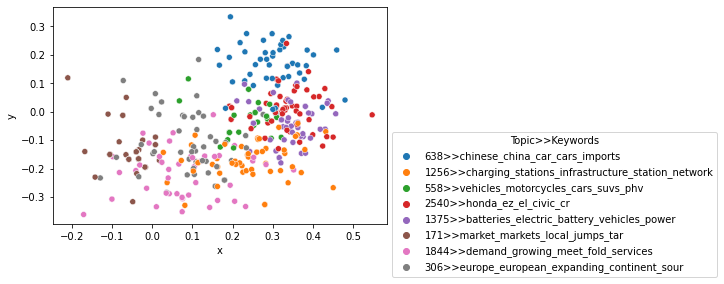

In [80]:
g = sns.scatterplot(x='x', y='y', data=tmp, hue='hue')
sns.move_legend(g, "upper left", bbox_to_anchor=(1.00, .45), title='Topic>>Keywords')
plt.show()

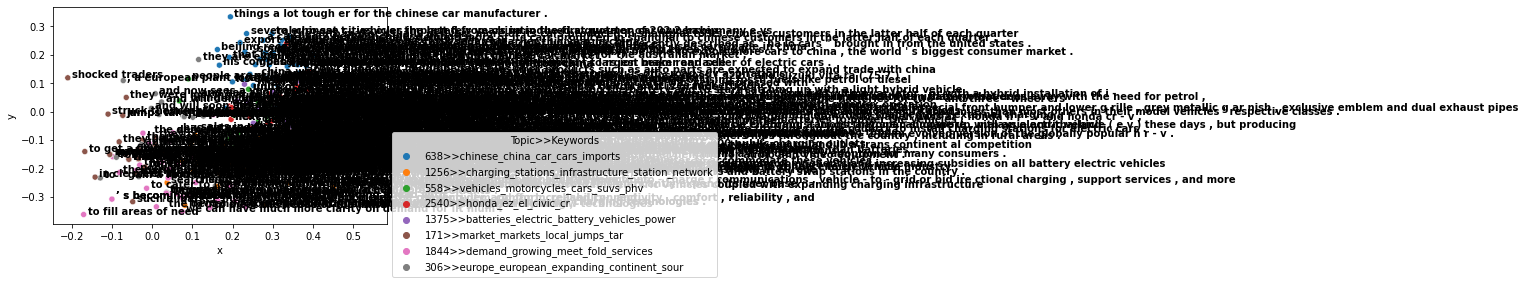

In [84]:
g = sns.scatterplot(x='x', y='y', data=tmp, hue='hue')
sns.move_legend(g, "upper left", bbox_to_anchor=(1.00, .45), title='Topic>>Keywords')

for i,row in tmp.iterrows():
     g.text(
         row.x+0.01, row.y, row.span, 
         horizontalalignment='left', 
         size='medium', 
         color='black', 
         weight='semibold'
     )

plt.show()

In [ ]:
top_10_nodes = list(node_weights.keys())[:10]
row_index_of_top_10_nodes = []


### Check NER removal

In [86]:
graph_tmp = pd.read_pickle(r"D:\66 CausalMap\SciLit_CausalMap\visualization\mir_paper\nodes_extracted_infos.pkl")
sum(graph_tmp['cause']!=graph_tmp['cause_action_rem'])+sum(graph_tmp['effect']!=graph_tmp['effect_action_rem'])

183

In [87]:
# identify a row with "China" in cause arg and check if it has been masked
graph_tmp[['china' in x for x in graph_tmp['cause']]]

,cause,effect,source,support,evidence,cause_action,effect_action,cause_action_rem,effect_action_rem,evidence_ner,cause_store,effect_store
92,"to jointly produce premium e vs in china , the...",audi signed a me morandum of understanding wit...,f-1012,1,"to jointly produce premium E Vs in China , the...",to jointly produce premium e vs in [LOCATION] ...,[ORGANIZATION] signed a me morandum of underst...,"to jointly produce premium e vs in [MASK] , th...",[MASK] signed a me morandum of understanding w...,"[(to, O), (jointly, O), (produce, O), (premium...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [..."
114,to develop a brand in china .,that it would create a simplified operating or...,f-1018,1,to develop a brand in China . --> that it woul...,to develop a brand in [LOCATION] .,that it would create a simplified operating or...,to develop a brand in [MASK] .,that it would create a simplified operating or...,"[(to, O), (develop, O), (a, O), (brand, O), (i...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [..."
115,to grow the brand ’ s profitable business in c...,ga c group and stella nti s will continue to c...,f-1018,1,to grow the brand ’ s profitable business in C...,to grow the brand ’ s profitable business in [...,[ORGANIZATION] and [ORGANIZATION] s will conti...,to grow the brand ’ s profitable business in [...,[MASK] and [MASK] s will continue to collabora...,"[(to, O), (grow, O), (the, O), (brand, O), (’,...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [..."
124,"- china has "" too many "" electric vehicle ( e ...",and the government will encourage consolidation,f-1021,1,"- China has "" too many "" electric vehicle ( E ...","- [LOCATION] has "" too many "" electric vehicle...",and the government will encourage consolidation,"- [MASK] has "" too many "" electric vehicle ( e...",and the government will encourage consolidation,"[(-, O), (China, LOCATION), (has, O), (``, O),...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [..."
133,"has reopened its factory in china ,",and has said the vast majority of its dealers ...,f-1023,1,"has reopened its factory in China , --> and ha...","has reopened its factory in [LOCATION] ,",and has said the vast majority of its dealers ...,"has reopened its factory in [MASK] ,",and has said the vast majority of its dealers ...,"[(has, O), (reopened, O), (its, O), (factory, ...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [..."
139,i ce vehicle sales in china,", terminal decline is already well under way .",f-1025,1,"I CE vehicle sales in China --> , terminal dec...",i ce vehicle sales in [LOCATION],", terminal decline is already well under way .",i ce vehicle sales in [MASK],", terminal decline is already well under way .","[(I, O), (CE, O), (vehicle, O), (sales, O), (i...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [..."
164,trying to build a business empire in china,"ji a yu eting , an entrepreneur who ran up bil...",f-1033,1,trying to build a business empire in China -->...,trying to build a business empire in [LOCATION],"[PERSON] , an entrepreneur who ran up [MONEY] ...",trying to build a business empire in [MASK],"[MASK] , an entrepreneur who ran up [MASK] in ...","[(trying, O), (to, O), (build, O), (a, O), (bu...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [...","{'ORGANIZATION': [], 'LOCATION': [], 'DATE': [..."
185,fresh g eo poli tical tensions between the wes...,the problem is now coming up again for europe,f-1043,1,fresh g eo poli tical tensions between the Wes...,fresh g eo poli tical tensions between the wes...,the problem is now coming up again for [LOCATION],fresh g eo poli tical tensions between the wes...,the problem is now coming up again for [MASK],"[(fresh, O

In [88]:
print(graph_tmp.iloc[92]['evidence_ner'])
print(graph_tmp.iloc[92]['cause'])
print(graph_tmp.iloc[92]['cause_store'])
print(graph_tmp.iloc[92]['cause_action_rem'])

[('to', 'O'), ('jointly', 'O'), ('produce', 'O'), ('premium', 'O'), ('E', 'O'), ('Vs', 'O'), ('in', 'O'), ('China', 'LOCATION'), (',', 'O'), ('the', 'O'), ('world', 'O'), ("'", 'O'), ('s', 'O'), ('largest', 'O'), ('car', 'O'), ('market', 'O'), ('.', 'O'), ('--', 'O'), ('>', 'O'), ('Audi', 'ORGANIZATION'), ('signed', 'O'), ('a', 'O'), ('me', 'O'), ('morandum', 'O'), ('of', 'O'), ('understanding', 'O'), ('with', 'O'), ('China', 'LOCATION'), ("'", 'O'), ('s', 'O'), ('state', 'O'), ('-', 'O'), ('owned', 'O'), ('FA', 'ORGANIZATION'), ('W', 'ORGANIZATION'), ('Group', 'ORGANIZATION'), ('in', 'O'), ('October', 'DATE'), ('2020', 'DATE'), (';', 'O'), ('[', 'O'), ("'unicausal+", 'O'), ("'", 'O'), (']', 'O'), (';', 'O'), ('Audi', 'ORGANIZATION'), ('signed', 'O'), ('a', 'O'), ('memorandum', 'O'), ('of', 'O'), ('understanding', 'O'), ('with', 'O'), ('China', 'LOCATION'), ("'s", 'O'), ('state-owned', 'O'), ('FAW', 'ORGANIZATION'), ('Group', 'ORGANIZATION'), ('in', 'O'), ('October', 'DATE'), ('2020', 

In [81]:
graph_tmp.iloc[951]

cause                it rivals toyota ch - r and jeep rene gade in ...
effect               that the h r - v will be slightly more expensi...
source                                                          f-1303
support                                                              1
evidence             it rivals Toyota CH - R and Jeep Rene gade in ...
cause_action         it rivals toyota ch - r and jeep rene gade in ...
effect_action        that the h r - v will be slightly more expensi...
cause_action_rem     it rivals toyota ch - r and jeep rene gade in ...
effect_action_rem    that the h r - v will be slightly more expensi...
evidence_ner         [(it, O), (rivals, O), (Toyota, ORGANIZATION),...
cause_store          {'ORGANIZATION': [], 'LOCATION': [], 'DATE': [...
effect_store         {'ORGANIZATION': [], 'LOCATION': [], 'DATE': [...
Name: 951, dtype: object